In [106]:
import numpy as np
import numpy.linalg as la
import autograd
%matplotlib inline

import matplotlib.pyplot as plt
import autograd.numpy as np_
np.set_printoptions(precision=3)

In [104]:
xi    = [3, 5]  
beta  = [1,1]
eps   = [1,1] 
gamma = [1,1]
print(r"$\xi_1/(2\beta_1)$ : ", xi[0]/(2*beta[0]))
print(r"$\xi_2/(2\beta_2)$ : ", xi[1]/(2*beta[1]))
a=1
h=lambda x: (x-a)

f1=lambda x: (xi[0]/2)*x[0]**2-beta[0]*eps[0]*x[0]*h(x[0])-beta[0]*gamma[0]*x[0]*x[1]
f2=lambda x: (xi[1]/2)*x[1]**2-beta[1]*eps[1]*x[1]*x[1]-beta[1]*gamma[1]*x[0]*x[1]

f1_=lambda x,y: (xi[0]/2)*x**2-beta[0]*eps[0]*x*h(x)-beta[0]*gamma[0]*x*y
f2_=lambda x,y: (xi[1]/2)*y**2-beta[1]*eps[1]*y**2-beta[1]*gamma[1]*x*y

socost= lambda x,y: f1_(x,y)+f2_(x,y)

def getNash():
    denom1=(xi[0]*(-2*beta[1]*eps[1] + xi[1]) + beta[0]*(4*beta[1]*eps[0]*eps[1] - beta[1]*gamma[1]*gamma[0] - 2*eps[0]*xi[1]))
    NE1=(a*beta[0]*eps[0]*(2*beta[1]*eps[1] - xi[1]))/denom1
    denom2=(4*beta[0]*beta[1]*eps[1]*eps[0] - beta[0]*beta[1]*gamma[0]*gamma[1] -   2*beta[1]*eps[1]*xi[0] - 2*beta[0]*eps[0] *xi[1] + xi[0]*xi[1])
    NE2=-(a*beta[0]*beta[1]*eps[0]*gamma[1])/denom2
    return np.array([NE1,NE2])

def getSO():
    beta1=beta[0]; beta2=beta[1]
    gamma1=gamma[0]; gamma2=gamma[1]
    eps1=eps[0]; eps2=eps[1]; xi1=xi[0]; xi2=xi[1]
    
    denom1=(beta1**2*gamma1**2 + beta2**2*gamma2**2 + 2*beta2*eps2*xi1 - xi1*xi2 + beta1*(-4*beta2*eps1*eps2 + 2*beta2*gamma1*gamma2 + 2*eps1*xi2))
    SO1=(a*beta1*eps1*(-2*beta2*eps2 + xi2))/denom1
    
    denom2=(beta1**2*gamma1**2 + beta2**2*gamma2**2 + 2*beta2*eps2*xi1 - xi1*xi2 + beta1*(-4*beta2*eps1*eps2 + 2*beta2*gamma1*gamma2 + 2*eps1*xi2))
    SO2=(a*beta1*eps1*(beta1*gamma1 + beta2*gamma2))/denom2
    return np.array([SO1,SO2])
    
def getPS():
    beta1=beta[0]; beta2=beta[1]
    gamma1=gamma[0]; gamma2=gamma[1]
    eps1=eps[0]; eps2=eps[1]; xi1=xi[0]; xi2=xi[1]
    
    denom1=(xi1*(-beta2*eps2 + xi2) +  beta1*(beta2*eps1*eps2 - beta2*gamma1*gamma2 - eps1*xi2))
    PS1=(a*beta1*eps1*(beta2*eps2 - xi2))/denom1
    
    denom2=(beta1*beta2*eps1*eps2 - beta1*beta2*gamma1*gamma2 - beta2*eps2*xi1 - beta1*eps1*xi2 + xi1*xi2)
    PS2=-(a*beta1*beta2*eps1*gamma2)/denom2
    
    return np.array([PS1,PS2])
    
df1= autograd.grad(f1_,0)
df2= autograd.grad(f2_,1)
d11f1 = autograd.grad(df1,0)
d12f1 = autograd.grad(df1,1)
d22f2 = autograd.grad(df2,1)
d21f2 = autograd.grad(df2,0)

def gamejac(x):
    x_,y_=x
    return np.array([[d11f1(x_,y_), d12f1(x_,y_)],[d21f2(x_,y_),d22f2(x_,y_)]])

def isNash(x):
    x_,y_=x
    if d11f1(x_,y_)>0 and d22f2(x_,y_)>0:
        print(" {},{} is a Nash equilibrium".format(x_,y_))
        out=True
    else:
        print(" {},{} is NOT a Nash equilibrium".format(x_,y_))
        out=False
    return out

def globalmin()

$\xi_1/(2\beta_1)$ :  1.5
$\xi_2/(2\beta_2)$ :  2.5


In [105]:
ne=getNash()
so=getSO()
ps=getPS()
print("Nash : ", ne)
print("SO   : ", so)
print("PS   : ", ps)

Nash :  [-0.015 -0.005]
SO   :  [0.03 0.02]
PS   :  [-0.006 -0.001]


In [102]:
#df1(ne[0],ne[1]), ddf1(ne[0],ne[1])
#la.eigvals(gamejac(ne))

In [103]:
print("Player 1 : ")
print("Nash Cost : {:0.3f}".format(f1(ne)))
print("So Cost   : {:0.3f}".format(f1(so)))
print("PS Cost   : {:0.3f}".format( f1(ps)))
print()
print("Player 2 : ")
print("Nash Cost : {:0.3f}".format(f2(ne)))
print("So Cost   : {:0.3f}".format(f2(so)))
print("PS Cost   : {:0.3f}".format(f2(ps)))

Player 1 : 
Nash Cost : -0.011
So Cost   : 0.015
PS Cost   : -0.005

Player 2 : 
Nash Cost : -0.004
So Cost   : 0.000
PS Cost   : -0.001


In [134]:
f1_(0,0), f2_(0,0)

(0.0, 0.0)

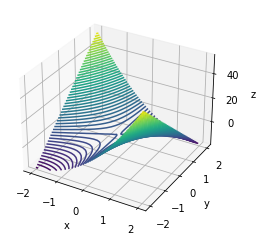

In [130]:


x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)

X, Y = np.meshgrid(x, y)
Z1 = f1_(X, Y)
Z2 = f2_(X,Y)
Z3=f1_(X,Y)+f2_(X,Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

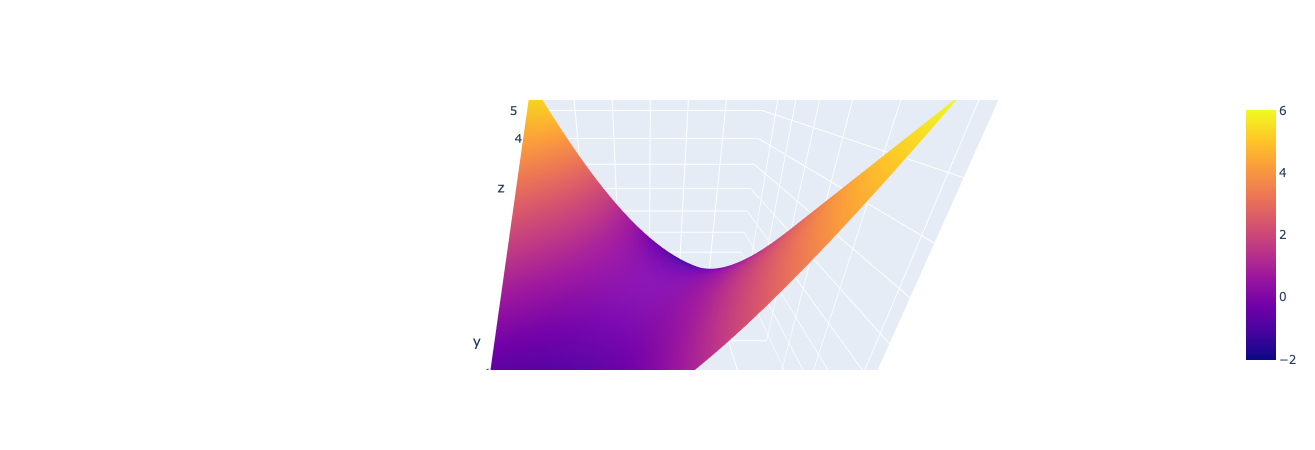

In [131]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(z=Z1)])
fig.update_layout( scene = {
            #"xaxis": {"nticks": 20},
            #"zaxis": {"nticks": 10},
            'camera_eye': {"x": 0, "y": -1, "z": 0.5},
            "aspectratio": {"x": 1, "y": 1, "z": 1}
        }) #,width=500, height=400) #title='Mt Bruno Elevation', autosize=True,
                  #width=500, height=400,
                  #margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [135]:
fig = go.Figure(data=[go.Surface(z=Z2)])
fig.update_layout( scene = {
            #"xaxis": {"nticks": 20},
            #"zaxis": {"nticks": 10},
         #   'camera_eye': {"x": 0, "y": -1, "z": 0.5},
            "aspectratio": {"x": 1, "y": 1, "z": 1}
        }) #,width=500, height=400) #title='Mt Bruno Elevation', autosize=True,
                  #width=500, height=400,
                  #margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [138]:
from cvxopt import matrix, solvers

In [137]:
!pip3 install cvxopt

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 3.1 MB 2.4 MB/s eta 0:00:01
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [139]:
import cvxpy as cp

In [148]:
x=cp.Variable(2)
h=np.ones(4)
G=np.array([[1,0],[0,1],[-1,0],[0,-1]])
P=np.array([[0.5,-0.25*0.001],[-0.25*0.001,0]])
prob=cp.Problem(cp.Minimize(cp.quad_form(x,P)),[G@x<=h])

In [149]:
prob.solve()

DCPError: Problem does not follow DCP rules. Specifically:
The objective is not DCP, even though each sub-expression is.
You are trying to minimize a function that is concave.

In [192]:
xi    = [3, 5]  
beta  = [1,1]

gamma = [1,1]
print(r"$\xi_1/(2\beta_1)$ : ", xi[0]/(2*beta[0]))
print(r"$\xi_2/(2\beta_2)$ : ", xi[1]/(2*beta[1]))
a=0.1
h=lambda x, a: (x-a)

def f1(x, eps=[1,1], a=0, h=h): 
    return (xi[0]/2)*x[0]**2-beta[0]*eps[0]*x[0]*h(x[0],a)-beta[0]*gamma[0]*x[0]*x[1]
def f2(x, eps=[1,1]):
    return (xi[1]/2)*x[1]**2-beta[1]*eps[1]*x[1]*x[1]-beta[1]*gamma[1]*x[0]*x[1]

def f1_(x,y, eps=1, a=0, h=h): 
    return (xi[0]/2)*x**2-beta[0]*eps[0]*x*h(x,a)-beta[0]*gamma[0]*x*y
def f2_( x,y, eps=1):
    return (xi[1]/2)*y**2-beta[1]*eps[1]*y**2-beta[1]*gamma[1]*x*y

def socost(x,y, eps=1, a=0): 
    return f1_(x,y, eps=eps, a=a)+f2_(x,y, eps=eps)

def getNash(eps=[1,1], a=0):
    denom1=(xi[0]*(-2*beta[1]*eps[1] + xi[1]) + beta[0]*(4*beta[1]*eps[0]*eps[1] - beta[1]*gamma[1]*gamma[0] - 2*eps[0]*xi[1]))
    NE1=(a*beta[0]*eps[0]*(2*beta[1]*eps[1] - xi[1]))/denom1
    denom2=(4*beta[0]*beta[1]*eps[1]*eps[0] - beta[0]*beta[1]*gamma[0]*gamma[1] -   2*beta[1]*eps[1]*xi[0] - 2*beta[0]*eps[0] *xi[1] + xi[0]*xi[1])
    NE2=-(a*beta[0]*beta[1]*eps[0]*gamma[1])/denom2
    return np.array([NE1,NE2])

def getSO(eps=[1,1], a=0):
    beta1=beta[0]; beta2=beta[1]
    gamma1=gamma[0]; gamma2=gamma[1]
    eps1=eps[0]; eps2=eps[1]; xi1=xi[0]; xi2=xi[1]
    
    denom1=(beta1**2*gamma1**2 + beta2**2*gamma2**2 + 2*beta2*eps2*xi1 - xi1*xi2 + beta1*(-4*beta2*eps1*eps2 + 2*beta2*gamma1*gamma2 + 2*eps1*xi2))
    SO1=(a*beta1*eps1*(-2*beta2*eps2 + xi2))/denom1
    
    denom2=(beta1**2*gamma1**2 + beta2**2*gamma2**2 + 2*beta2*eps2*xi1 - xi1*xi2 + beta1*(-4*beta2*eps1*eps2 + 2*beta2*gamma1*gamma2 + 2*eps1*xi2))
    SO2=(a*beta1*eps1*(beta1*gamma1 + beta2*gamma2))/denom2
    return np.array([SO1,SO2])
    
def getPS(eps=[1,1],a=0):
    beta1=beta[0]; beta2=beta[1]
    gamma1=gamma[0]; gamma2=gamma[1]
    eps1=eps[0]; eps2=eps[1]; xi1=xi[0]; xi2=xi[1]
    
    denom1=(xi1*(-beta2*eps2 + xi2) +  beta1*(beta2*eps1*eps2 - beta2*gamma1*gamma2 - eps1*xi2))
    PS1=(a*beta1*eps1*(beta2*eps2 - xi2))/denom1
    
    denom2=(beta1*beta2*eps1*eps2 - beta1*beta2*gamma1*gamma2 - beta2*eps2*xi1 - beta1*eps1*xi2 + xi1*xi2)
    PS2=-(a*beta1*beta2*eps1*gamma2)/denom2
    
    return np.array([PS1,PS2])
    
df1= autograd.grad(f1_,0)
df2= autograd.grad(f2_,1)
d11f1 = autograd.grad(df1,0)
d12f1 = autograd.grad(df1,1)
d22f2 = autograd.grad(df2,1)
d21f2 = autograd.grad(df2,0)

def gamejac(x, eps=1, a=0):
    x_,y_=x
    return np.array([[d11f1(x_,y_, eps=eps, a=a), d12f1(x_,y_, eps=eps, a=a)],[d21f2(x_,y_, eps=eps),d22f2(x_,y_, eps=eps)]])

def isNash(x, eps=1, a=0):
    x_,y_=x
    if d11f1(x_,y_, eps=eps, a=a)>0 and d22f2(x_,y_, eps=eps)>0:
        print(" {},{} is a Nash equilibrium".format(x_,y_))
        out=True
    else:
        print(" {},{} is NOT a Nash equilibrium".format(x_,y_))
        out=False
    return out



$\xi_1/(2\beta_1)$ :  1.5
$\xi_2/(2\beta_2)$ :  2.5


(100, 2)
(100,)


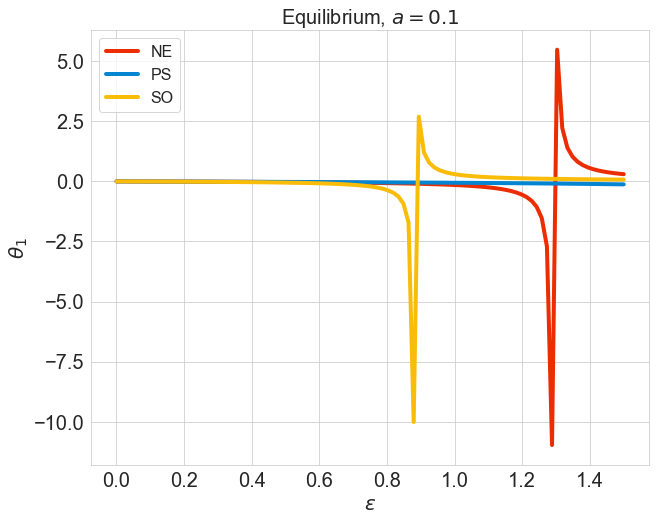

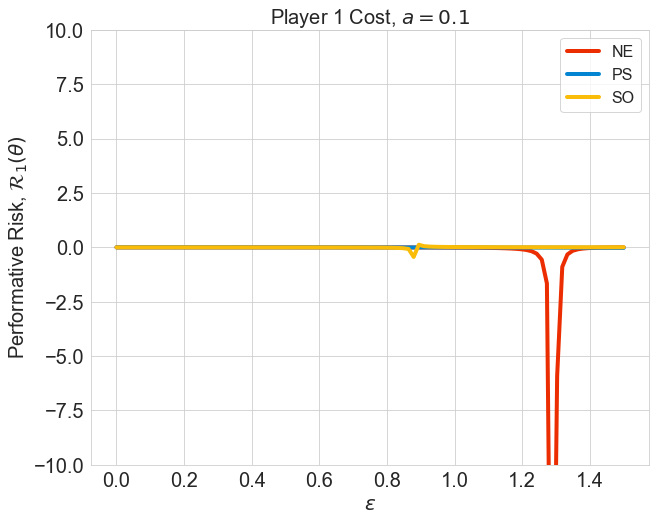

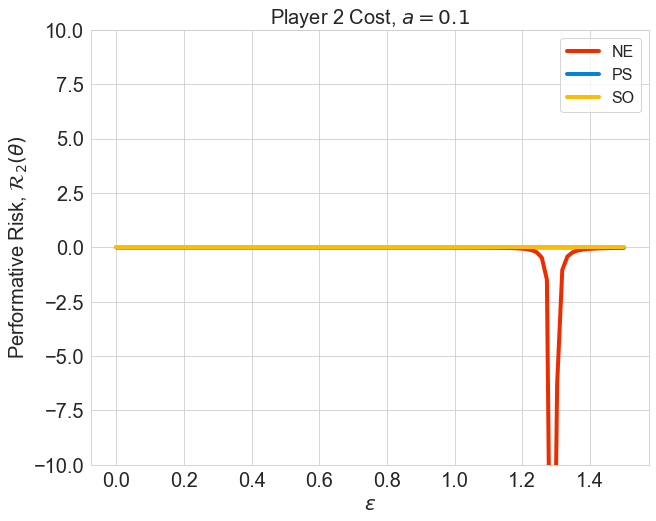

In [193]:
import seaborn as sns
sns.set_style("whitegrid")
ne_=[]; f1nash=[]; f2nash=[]
so_=[]; f1so=[]; f2so=[]
ps_=[]; f1ps=[]; f2ps=[]
epsvals=np.linspace(0,3/2, 100)

for eps_ in epsvals:
    ne=getNash(eps=[eps_,eps_],a=a)
    ne_.append(ne)
    f1nash.append(f1_(ne[0], ne[1], eps=[eps_,eps_], a=a))
    f2nash.append(f2_(ne[0], ne[1], eps=[eps_,eps_]))
    so=getSO(eps=[eps_,eps_],a=a)
    f1so.append(f1_(so[0], so[1], eps=[eps_,eps_], a=a))
    f2so.append(f2_(so[0], so[1], eps=[eps_,eps_]))
    so_.append(so)
    ps=getPS(eps=[eps_,eps_], a=a)
    f1ps.append(f1_(ps[0], ps[1], eps=[eps_,eps_], a=a))
    f2ps.append(f2_(ps[0], ps[1], eps=[eps_,eps_]))
    ps_.append(ps)
    #print("Nash : ", ne)
    #print("SO   : ", so)
    #print("PS   : ", ps)
    
cols=['xkcd:tomato red', 'xkcd:cerulean', 'xkcd:golden rod']
ne_=np.asarray(ne_)
so_=np.asarray(so_)
ps_=np.asarray(ps_)
print(np.shape(ne_))
plt.figure(figsize=(10,8))
plt.title(r"Equilibrium, $a={}$".format(a), fontsize=20)
plt.plot(epsvals,ne_[:,0], linewidth=4, color=cols[0], label="NE")
plt.plot(epsvals,ps_[:,0], linewidth=4, color=cols[1], label="PS")
plt.plot(epsvals,so_[:,0], linewidth=4, color=cols[2], label="SO")
plt.xlabel(r'$\epsilon$', fontsize=20)
plt.tick_params(labelsize=20)
plt.legend(fontsize=16)
plt.ylabel(r'$\theta_1$', fontsize=20)
for tag in ['png', 'pdf']:
    plt.savefig('./figs/equilibrium_a={}_varyingeps.'.format(a)+tag, dpi=300, transparent=True, bbox_inches='tight')

f1nash=np.asarray(f1nash)
f2nash=np.asarray(f2nash)
f1so=np.asarray(f1so)
f2so=np.asarray(f2so)
f1ps=np.asarray(f1ps)
f2ps=np.asarray(f2ps)
print(np.shape(f1nash))
plt.figure(figsize=(10,8))
plt.title(r"Player 1 Cost, $a={}$".format(a), fontsize=20)
plt.plot(epsvals,f1nash[:], linewidth=4, label="NE", color=cols[0])
plt.plot(epsvals,f1ps[:], linewidth=4, label="PS", color=cols[1])
plt.plot(epsvals,f1so[:], linewidth=4, label="SO", color=cols[2])
plt.ylim([-10,10])
plt.xlabel(r'$\epsilon$', fontsize=20)
plt.ylabel(r'Performative Risk, $\mathcal{R}_1(\theta)$', fontsize=20)
plt.legend(fontsize=16)
plt.tick_params(labelsize=20)
for tag in ['png', 'pdf']:
    plt.savefig('./figs/p1costs_a={}_varyingeps.'.format(a)+tag, dpi=300, transparent=True, bbox_inches='tight')
    
plt.figure(figsize=(10,8))
plt.title(r"Player 2 Cost, $a={}$".format(a), fontsize=20)
plt.plot(epsvals,f2nash[:], linewidth=4, label="NE", color=cols[0])
plt.plot(epsvals,f2ps[:], linewidth=4, label="PS", color=cols[1])
plt.plot(epsvals,f2so[:], linewidth=4, label="SO", color=cols[2])
plt.ylim([-10,10])
plt.xlabel(r'$\epsilon$', fontsize=20)
plt.ylabel(r'Performative Risk, $\mathcal{R}_2(\theta)$', fontsize=20)
plt.legend(fontsize=16)
plt.tick_params(labelsize=20)
for tag in ['png', 'pdf']:
    plt.savefig('./figs/p2costs_a={}_varyingeps.'.format(a)+tag, dpi=300, transparent=True, bbox_inches='tight')

In [102]:
#df1(ne[0],ne[1]), ddf1(ne[0],ne[1])
#la.eigvals(gamejac(ne))

In [103]:
print("Player 1 : ")
print("Nash Cost : {:0.3f}".format(f1(ne)))
print("So Cost   : {:0.3f}".format(f1(so)))
print("PS Cost   : {:0.3f}".format( f1(ps)))
print()
print("Player 2 : ")
print("Nash Cost : {:0.3f}".format(f2(ne)))
print("So Cost   : {:0.3f}".format(f2(so)))
print("PS Cost   : {:0.3f}".format(f2(ps)))

Player 1 : 
Nash Cost : -0.011
So Cost   : 0.015
PS Cost   : -0.005

Player 2 : 
Nash Cost : -0.004
So Cost   : 0.000
PS Cost   : -0.001


(100, 2)
(100,)


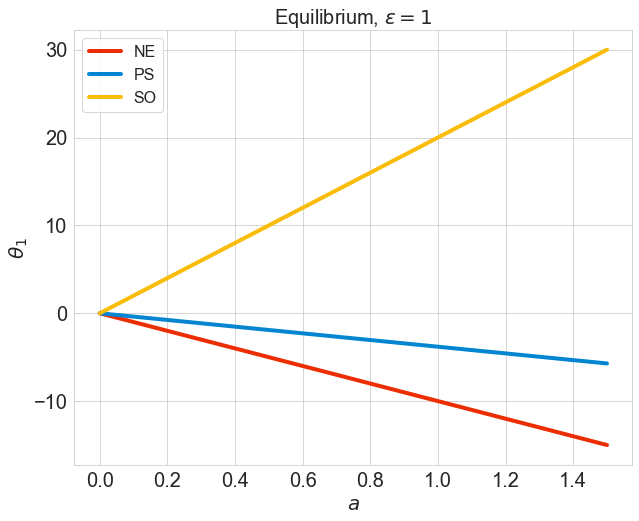

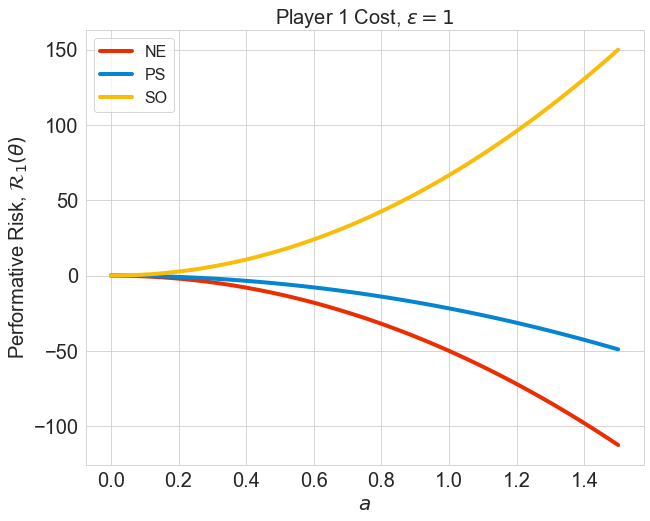

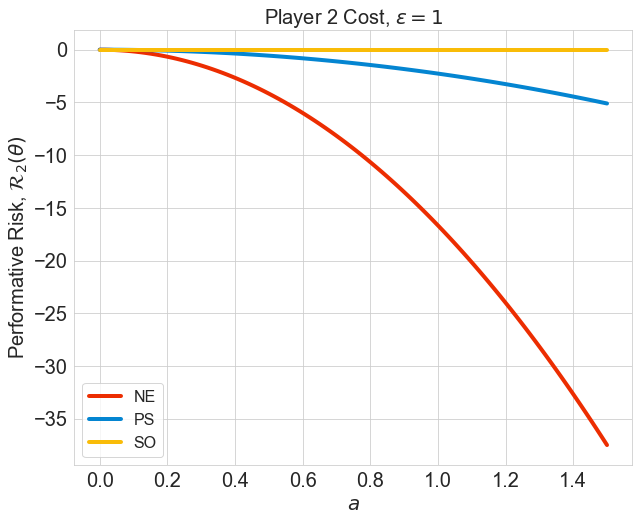

In [197]:
import seaborn as sns
sns.set_style("whitegrid")
ne_=[]; f1nash=[]; f2nash=[]
so_=[]; f1so=[]; f2so=[]
ps_=[]; f1ps=[]; f2ps=[]
avals=np.linspace(0,10, 100)
eps_=1 #[1,1]
for a in avals:
    ne=getNash(eps=[eps_,eps_],a=a)
    ne_.append(ne)
    f1nash.append(f1_(ne[0], ne[1], eps=[eps_,eps_], a=a))
    f2nash.append(f2_(ne[0], ne[1], eps=[eps_,eps_]))
    so=getSO(eps=[eps_,eps_],a=a)
    f1so.append(f1_(so[0], so[1], eps=[eps_,eps_], a=a))
    f2so.append(f2_(so[0], so[1], eps=[eps_,eps_]))
    so_.append(so)
    ps=getPS(eps=[eps_,eps_], a=a)
    f1ps.append(f1_(ps[0], ps[1], eps=[eps_,eps_], a=a))
    f2ps.append(f2_(ps[0], ps[1], eps=[eps_,eps_]))
    ps_.append(ps)
    #print("Nash : ", ne)
    #print("SO   : ", so)
    #print("PS   : ", ps)
    
cols=['xkcd:tomato red', 'xkcd:cerulean', 'xkcd:golden rod']
ne_=np.asarray(ne_)
so_=np.asarray(so_)
ps_=np.asarray(ps_)
print(np.shape(ne_))
plt.figure(figsize=(10,8))
plt.title(r"Equilibrium, $\epsilon={}$".format(eps_), fontsize=20)
plt.plot(epsvals,ne_[:,0], linewidth=4, color=cols[0], label="NE")
plt.plot(epsvals,ps_[:,0], linewidth=4, color=cols[1], label="PS")
plt.plot(epsvals,so_[:,0], linewidth=4, color=cols[2], label="SO")
plt.xlabel(r'$a$', fontsize=20)
plt.tick_params(labelsize=20)
plt.legend(fontsize=16)
plt.ylabel(r'$\theta_1$', fontsize=20)
for tag in ['png', 'pdf']:
    plt.savefig('./figs/equilibrium_eps={}_varyinga.'.format(eps_)+tag, dpi=300, transparent=True, bbox_inches='tight')

f1nash=np.asarray(f1nash)
f2nash=np.asarray(f2nash)
f1so=np.asarray(f1so)
f2so=np.asarray(f2so)
f1ps=np.asarray(f1ps)
f2ps=np.asarray(f2ps)
print(np.shape(f1nash))
plt.figure(figsize=(10,8))
plt.title(r"Player 1 Cost, $\epsilon={}$".format(eps_), fontsize=20)
plt.plot(epsvals,f1nash[:], linewidth=4, label="NE", color=cols[0])
plt.plot(epsvals,f1ps[:], linewidth=4, label="PS", color=cols[1])
plt.plot(epsvals,f1so[:], linewidth=4, label="SO", color=cols[2])
#plt.ylim([-10,10])
plt.xlabel(r'$a$', fontsize=20)
plt.ylabel(r'Performative Risk, $\mathcal{R}_1(\theta)$', fontsize=20)
plt.legend(fontsize=16)
plt.tick_params(labelsize=20)
for tag in ['png', 'pdf']:
    plt.savefig('./figs/p1costs_eps={}_varyinga.'.format(eps_)+tag, dpi=300, transparent=True, bbox_inches='tight')
    
plt.figure(figsize=(10,8))
plt.title(r"Player 2 Cost, $\epsilon={}$".format(eps_), fontsize=20)
plt.plot(epsvals,f2nash[:], linewidth=4, label="NE", color=cols[0])
plt.plot(epsvals,f2ps[:], linewidth=4, label="PS", color=cols[1])
plt.plot(epsvals,f2so[:], linewidth=4, label="SO", color=cols[2])
#plt.ylim([-20,20])
plt.xlabel(r'$a$', fontsize=20)
plt.ylabel(r'Performative Risk, $\mathcal{R}_2(\theta)$', fontsize=20)
plt.legend(fontsize=16)
plt.tick_params(labelsize=20)
for tag in ['png', 'pdf']:
    plt.savefig('./figs/p2costs_eps={}_varyinga.'.format(eps_)+tag, dpi=300, transparent=True, bbox_inches='tight')